# Подготовка окружения и загрузка данных

## Импорт библиотек

In [1]:
#импорт библиотек

#основные
import pandas as pd
import numpy as np
from tqdm import tqdm

#математика
import math
from math import factorial
from math import sqrt

#статистика
from scipy import stats
from scipy.stats import binom
import random

#графики
import matplotlib.pyplot as plt
from sklearn import tree

#машинное обучение - общее
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

#машинное обучение - классификация
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Подготовка пользовательских функций

In [2]:
def explain_dataset(dataset, hist_on):
    dataset.info()
    print()
    print('количество полных дубликатов в таблице =', dataset.duplicated().sum())
    pd.set_option('display.max_columns', None)
    display(dataset.describe())
    display(dataset.head(10))
    if hist_on: dataset.hist(figsize=(15, 20), bins=30);

## Чтение файлов с данными

<b>Данные</b>
* train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Задача - предсказать значение 'music_genre' для каждого трека из этого датасета.

In [3]:
#читаем файл с обсучающими данными
df = pd.read_csv('kaggle_music_genre_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.480000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.243000,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.228000,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.055800,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.227000,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
5,43934.0,Eskimo Blue Day - Remastered,0.102000,0.308,392893.0,0.590,0.371000,D,0.1120,-11.703,Major,0.0345,145.758,4-Apr,0.496,Blues
6,23450.0,Living On My Own,0.000234,0.655,218267.0,0.687,0.000024,A,0.0869,-11.789,Minor,0.0337,123.923,4-Apr,0.411,Rock
7,28380.0,Para Machuchar Meu Coracao,0.953000,0.591,309813.0,0.109,0.357000,D#,0.0921,-17.975,Major,0.0449,130.597,4-Apr,0.395,Jazz
8,70054.0,In the Mood,0.195000,0.647,283373.0,0.595,0.000118,A#,0.1290,-8.416,Minor,0.0336,73.478,4-Apr,0.546,Jazz
9,74815.0,20.000 Volts,0.032300,0.537,237000.0,0.962,0.193000,C,0.1580,-2.749,Major,0.1210,160.031,4-Apr,0.430,Electronic


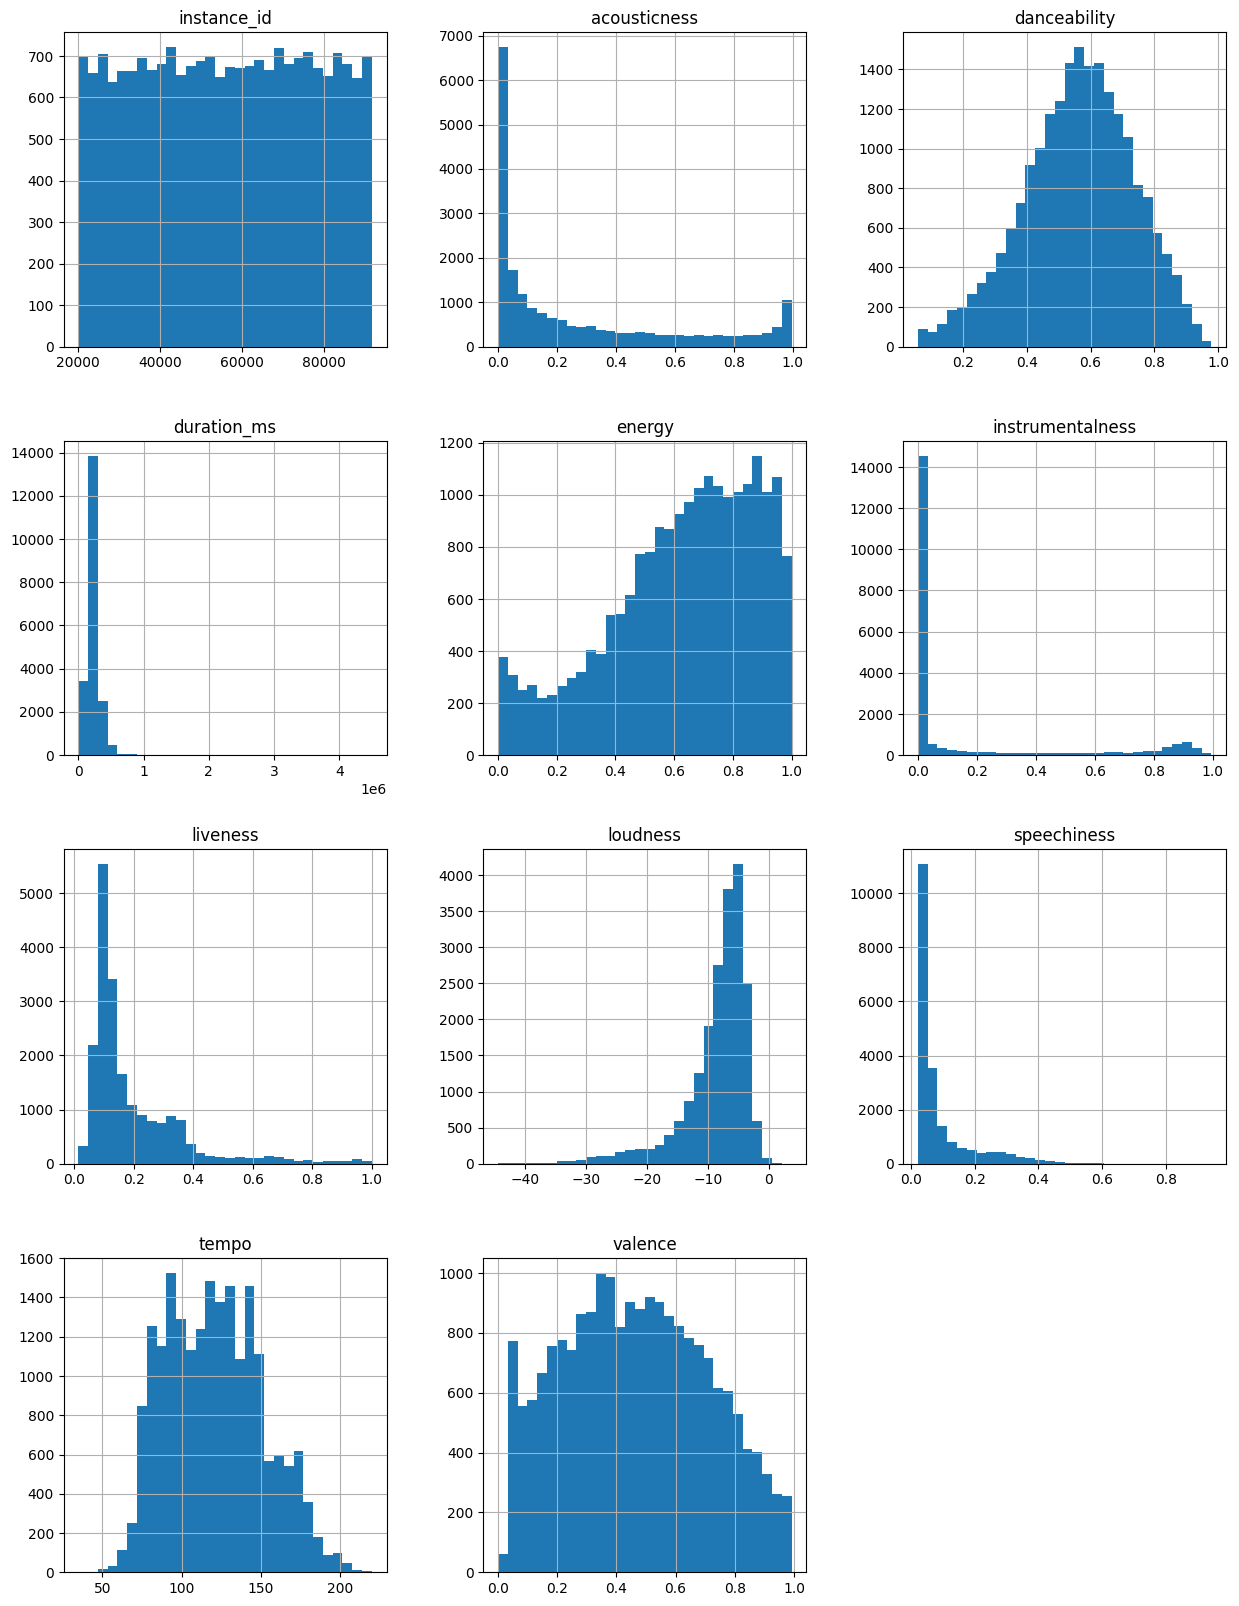

In [4]:
explain_dataset(df,True)

In [5]:
df_test = pd.read_csv('kaggle_music_genre_test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB

количество полных дубликатов

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5099.000000,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,4978.000000,5099.000000
mean,55643.871347,0.276324,0.561888,2.173974e+05,0.622030,0.165198,0.197924,-8.630186,0.092718,121.246463,0.465593
std,20762.384803,0.322657,0.170502,1.156374e+05,0.251829,0.311940,0.166241,5.619766,0.100130,29.875950,0.244217
min,20012.000000,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,0.020400,-46.122000,0.022600,37.114000,0.020500
25%,37571.000000,0.016600,0.451000,1.737335e+05,0.465000,0.000000,0.096950,-10.231000,0.035700,96.070250,0.272000
50%,55246.000000,0.120000,0.568000,2.175000e+05,0.660000,0.000157,0.129000,-7.135000,0.048700,120.053500,0.458000
75%,73702.000000,0.460000,0.681000,2.642470e+05,0.826000,0.092750,0.248000,-5.127000,0.096550,141.934250,0.650000
max,91709.000000,0.996000,0.977000,1.360027e+06,0.999000,0.994000,0.990000,1.949000,0.918000,216.029000,0.982000


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.000000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.008320,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.000000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.000000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.014800,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121
5,74228,If You're Going to the City,0.919000,0.516,227267.0,0.192,0.000026,A#,0.1840,-18.983,Minor,0.0650,73.241,4-Apr,0.603
6,39106,21 Questions,0.388000,0.547,224427.0,0.807,0.000091,F#,0.0436,-4.083,Minor,0.3600,79.823,3-Apr,0.919
7,78829,Husbands And Wives,0.653000,0.591,190032.0,0.388,0.000214,F,0.1670,-8.069,Major,0.0267,105.977,3-Apr,0.122
8,91469,Slow Me Down,0.214000,0.597,196160.0,0.602,0.000320,G,0.3130,-4.990,Major,0.0292,91.999,4-Apr,0.262
9,54558,Me Pegó la Gana,0.640000,0.578,168533.0,0.514,0.000000,G,0.1440,-5.990,Major,0.0401,66.342,3-Apr,0.857


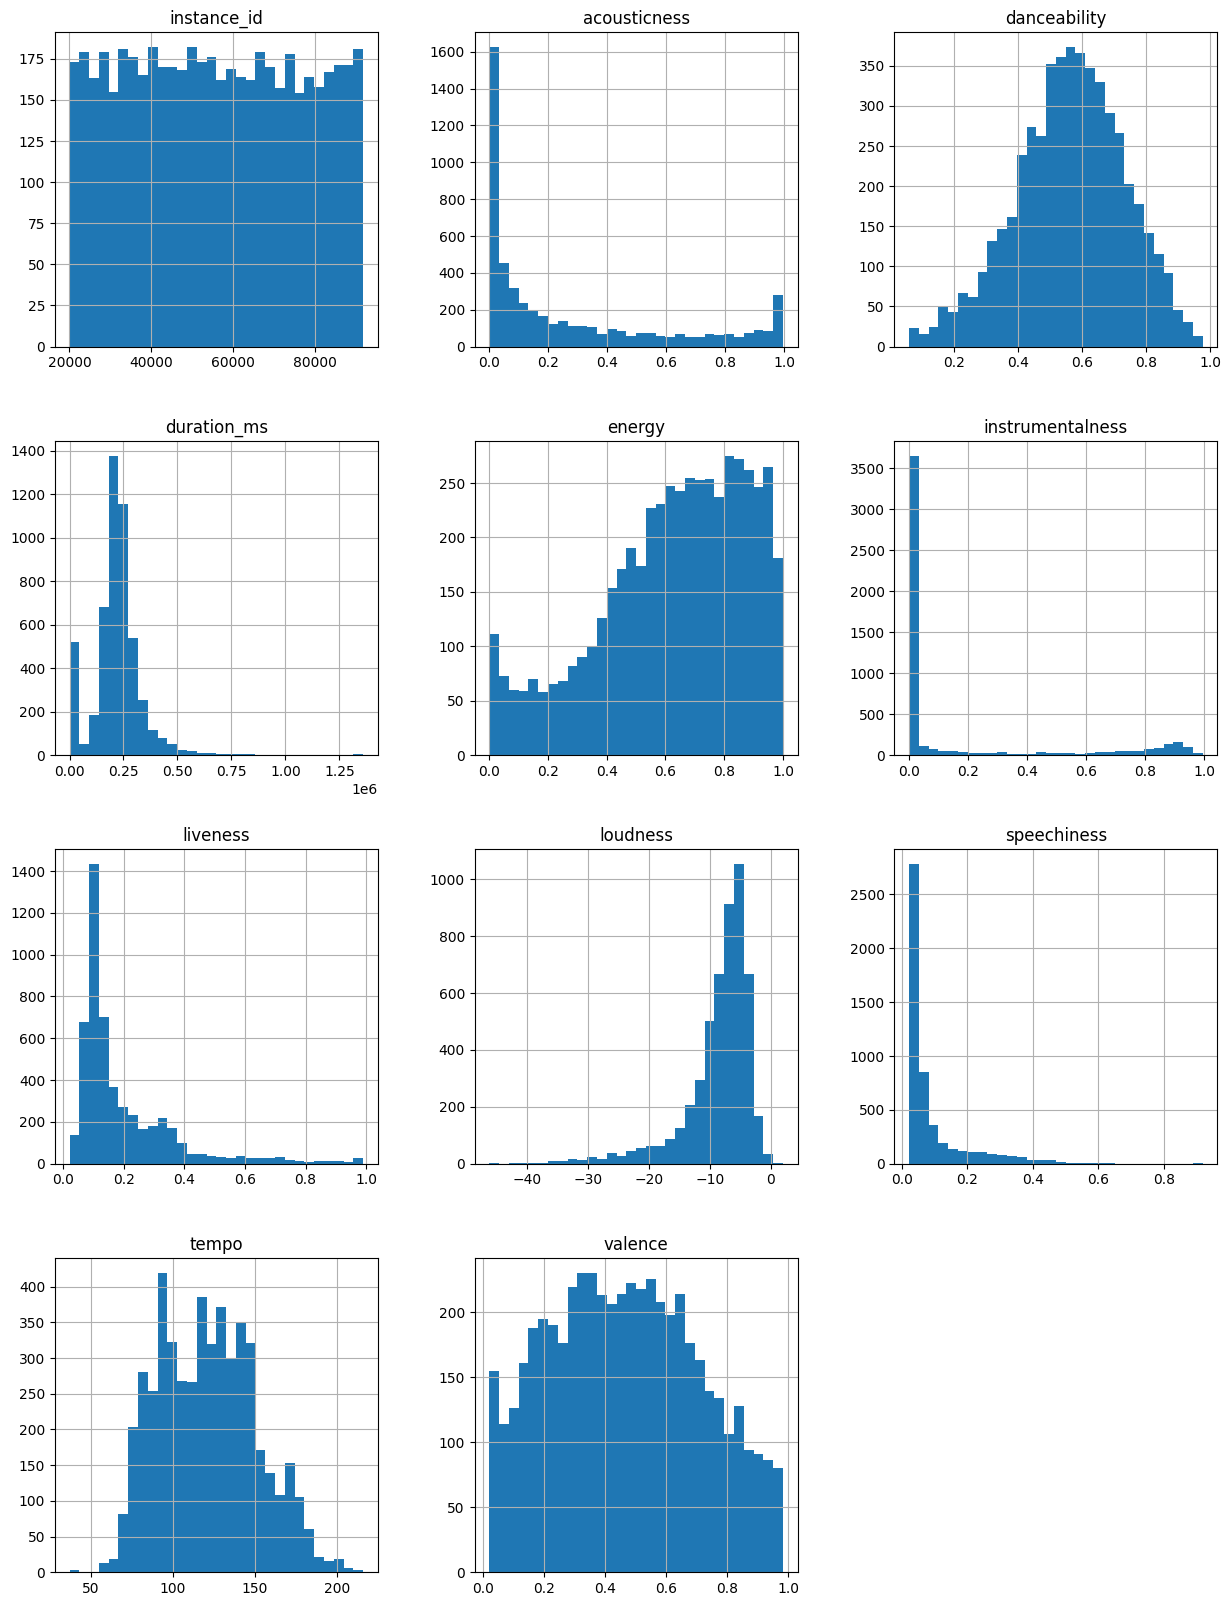

In [6]:
explain_dataset(df_test,True)

In [7]:
#добавим пустой столбец с целевым признаком
df_test['music_genre'] = ''

# Исследовательский анализ данных
Проведем анализ данных в каждом из признаков и подготовим их для дальнейшего использования при обсучении модели 

## Общее описание признаков в датасете

* instance_id - уникальный идентификатор трека
* track_name - название трека
* acousticness - акустичность
* danceability - танцевальность
* duration_ms -продолжительность в милисекундах
* energy - энергичность
* instrumentalness - инструментальность
* key - базовый ключ (нота) произведения
* liveness - привлекательность
* loudness - громкость
* mode - указывает на модальность (мажорную или минорную) трека
* speechiness - выразительность
* tempo - темп
* obtained_date - дата загрузки в сервис
* valence - привлекательность произведения для пользователей сервиса
* music_genre - музыкальный жанр

## Анализ и обработка признаков

### instance_id - идентификатор трека в тестовом наборе.
Признак не содержит значимой информации о треках, его можно отбросить при обучении

In [8]:
#выделим в отдельный массив признаки, не значимые для обучения
features_to_drop = ['instance_id']

### track_name - название трека
Название трека так-же врядли содержит значимые для обучения модели данные, отбросим этот признак

In [9]:
#дополним массив признаков, не значимых для обучения
features_to_drop.append('track_name')

### acousticness - акустичность
Cудя по первичному анализу - с ним не требуется ничего делать дополнительно, пропусков и выборов он не имеет. Оставляем в наборе для обучения модели

### danceability - танцевальность
Cудя по первичному анализу - с ним не требуется ничего делать дополнительно, пропусков и выборов он не имеет. Оставляем в наборе для обучения модели

### duration_ms -продолжительность в милисекундах
Проверим наличие выборосов в данных и заполним отстствующие значения длительности

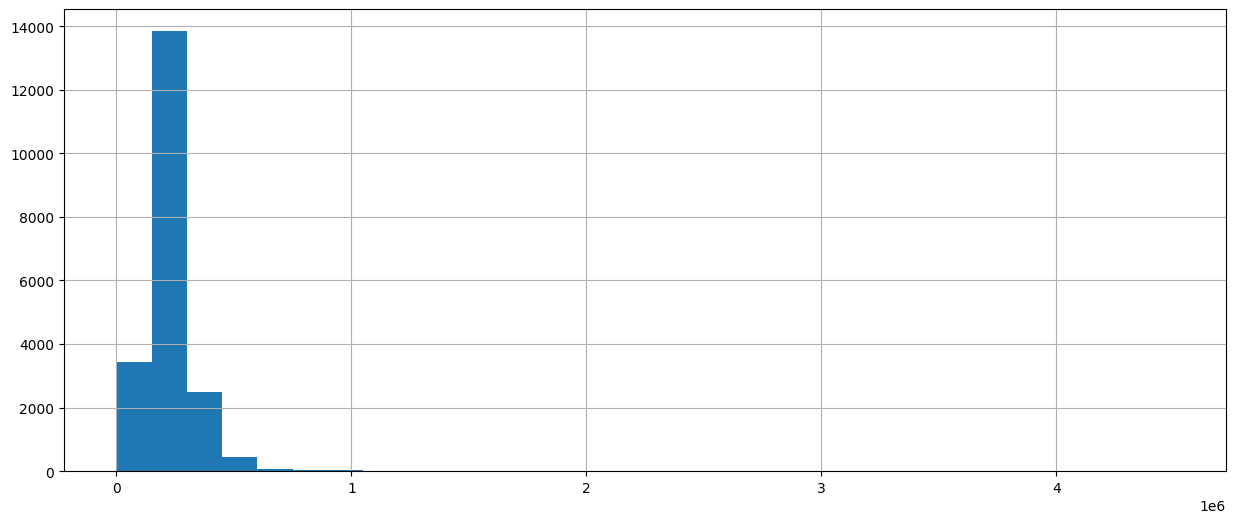

In [10]:
df['duration_ms'].hist(figsize=(15, 6), bins=30);

In [11]:
#проверим границы 90 и 95 процентили
print("Порог 90% =", df['duration_ms'].quantile(.9), "количество значений =", df[df['duration_ms']>df['duration_ms'].quantile(.9)]['duration_ms'].count(),)
print("Порог 95% =", df['duration_ms'].quantile(.95), "количество значений =", df[df['duration_ms']>df['duration_ms'].quantile(.95)]['duration_ms'].count(),)
print("Порог 98% =", df['duration_ms'].quantile(.98), "количество значений =", df[df['duration_ms']>df['duration_ms'].quantile(.98)]['duration_ms'].count(),)

Порог 90% = 330361.0 количество значений = 2040
Порог 95% = 393913.5499999998 количество значений = 1020
Порог 98% = 492308.24 количество значений = 408


In [12]:
#отбросим значния за пределами 98 процентиля
df = df[df['duration_ms'] < 492308.24]

In [13]:
#проверим минимальное значение признака
df['duration_ms'].min()

-1.0

In [14]:
#заполним значения признака с -1 медианой для данного жанра
df['duration_ms'] = df['duration_ms'].replace(-1,np.NaN)
df['duration_ms'] = df.groupby('music_genre',)['duration_ms'].transform(lambda x: x.fillna(x.median()))

### energy - энергичность
Cудя по первичному анализу - с ним не требуется ничего делать дополнительно, пропусков и выборов он не имеет. Оставляем в наборе для обучения модели

### instrumentalness - инструментальность
Cудя по первичному анализу - с ним не требуется ничего делать дополнительно, пропусков и выборов он не имеет. Оставляем в наборе для обучения модели

### key - базовый ключ (нота) произведения
В значениях признака имеются пропуски, заполним их наиболее частым вариантом для каждого жанра

In [15]:
#посчитаем количество пропусков
df['key'].isnull().sum()

721

In [16]:
#заполним пропуски наиболее частым значением
df['key'] = df.groupby('music_genre')['key'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

In [17]:
#посчитаем количество пропусков
df['key'].isnull().sum()

0

### liveness - привлекательность
Проверим наличие выборосов в данных

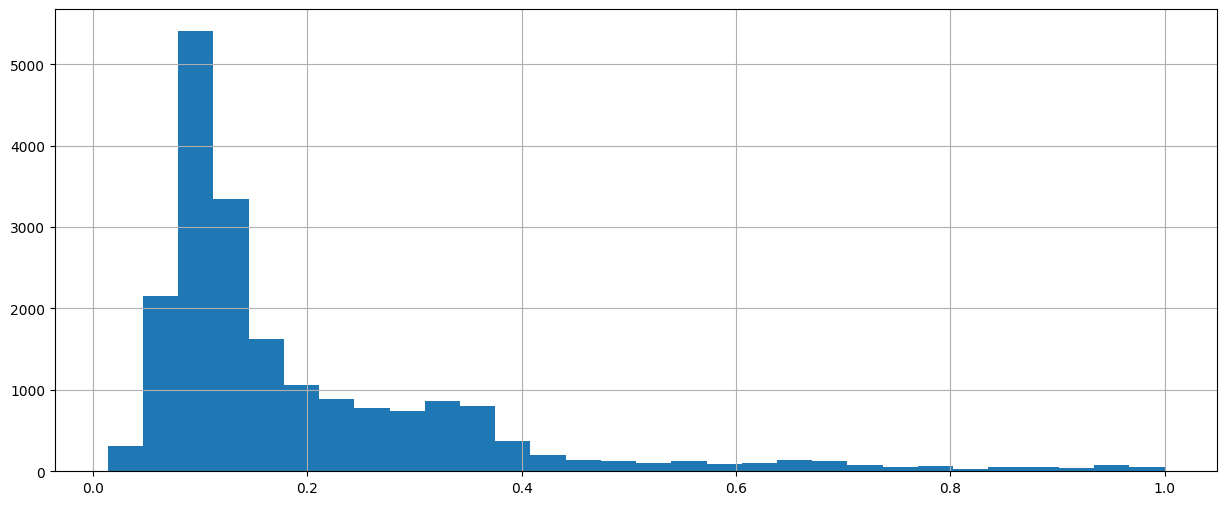

In [18]:
df['liveness'].hist(figsize=(15, 6), bins=30);

In [19]:
#проверим границы 95 и 98 процентили
print("Порог 90% =", df['liveness'].quantile(.9), "количество значений =", df[df['liveness']>df['liveness'].quantile(.9)]['liveness'].count(),)
print("Порог 95% =", df['liveness'].quantile(.95), "количество значений =", df[df['liveness']>df['liveness'].quantile(.95)]['liveness'].count(),)
print("Порог 98% =", df['liveness'].quantile(.98), "количество значений =", df[df['liveness']>df['liveness'].quantile(.98)]['liveness'].count(),)

Порог 90% = 0.376 количество значений = 1998
Порог 95% = 0.5607500000000001 количество значений = 1000
Порог 98% = 0.745 количество значений = 399


In [20]:
#отбросим значния за пределами 98 процентиля
df = df[df['liveness'] < 0.7582799999999988]

### loudness - громкость
Проверим наличие выборосов в данных

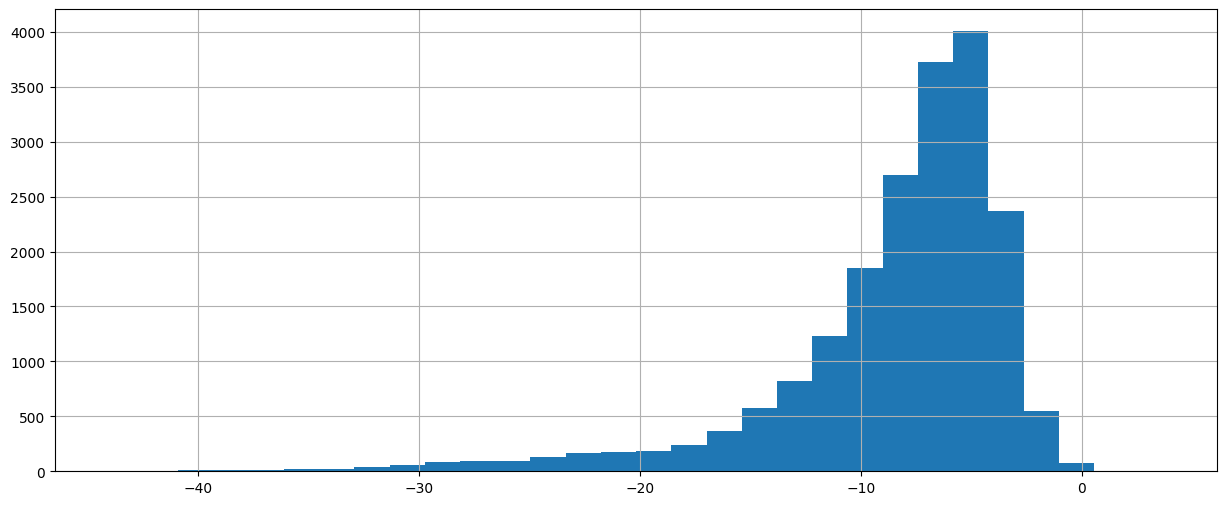

In [21]:
df['loudness'].hist(figsize=(15, 6), bins=30);

In [22]:
#проверим границы 5 и 2 процентили
print("Порог 10% =", df['loudness'].quantile(.1), "количество значений =", df[df['loudness']<df['loudness'].quantile(.1)]['loudness'].count(),)
print("Порог 5% =", df['loudness'].quantile(.05), "количество значений =", df[df['loudness']<df['loudness'].quantile(.05)]['loudness'].count(),)
print("Порог 2% =", df['loudness'].quantile(.02), "количество значений =", df[df['loudness']<df['loudness'].quantile(.02)]['loudness'].count(),)

Порог 10% = -14.593799999999996 количество значений = 1961
Порог 5% = -19.693 количество значений = 981
Порог 2% = -26.06668 количество значений = 393


In [23]:
#отбросим значения за пределами 2 процентиля
df = df[df['loudness'] > -26.06668]

In [24]:
#проверим границы 95 и 98 процентили
print("Порог 90% =", df['loudness'].quantile(.9), "количество значений =", df[df['loudness']>df['loudness'].quantile(.9)]['loudness'].count(),)
print("Порог 95% =", df['loudness'].quantile(.95), "количество значений =", df[df['loudness']>df['loudness'].quantile(.95)]['loudness'].count(),)
print("Порог 98% =", df['loudness'].quantile(.98), "количество значений =", df[df['loudness']>df['loudness'].quantile(.98)]['loudness'].count(),)

Порог 90% = -3.665 количество значений = 1919
Порог 95% = -2.9952500000000004 количество значений = 961
Порог 98% = -2.231299999999992 количество значений = 385


In [25]:
#отбросим значения больше либо равные 0
df = df[df['loudness'] < 0]

### mode - указывает на модальность (мажорную или минорную) трека
Заполним пропуски в данных признака

In [26]:
#посчитаем количество пропусков
df['mode'].isnull().sum()

481

In [27]:
#заполним пропуски наиболее частым значением
df['mode'] = df.groupby('music_genre')['mode'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

In [28]:
#посчитаем количество пропусков
df['mode'].isnull().sum()

0

### speechiness - выразительность
Проверим наличие выборосов в данных 

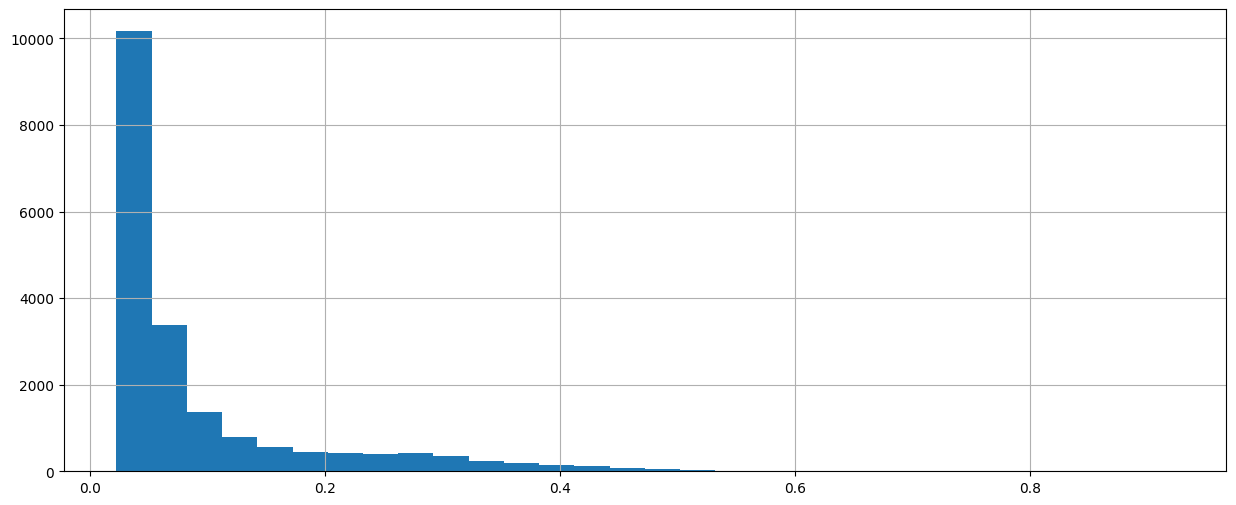

In [29]:
df['speechiness'].hist(figsize=(15, 6), bins=30);

In [30]:
#проверим границы 95 и 98 процентили
print("Порог 90% =", df['speechiness'].quantile(.9), "количество значений =", df[df['speechiness']>df['speechiness'].quantile(.9)]['speechiness'].count(),)
print("Порог 95% =", df['speechiness'].quantile(.95), "количество значений =", df[df['speechiness']>df['speechiness'].quantile(.95)]['speechiness'].count(),)
print("Порог 98% =", df['speechiness'].quantile(.98), "количество значений =", df[df['speechiness']>df['speechiness'].quantile(.98)]['speechiness'].count(),)

Порог 90% = 0.243 количество значений = 1915
Порог 95% = 0.315 количество значений = 958
Порог 98% = 0.397 количество значений = 379


In [31]:
#отбросим значения больше 0.45
df = df[df['speechiness'] < 0.45]

### tempo - темп
Заполним пропуски

In [32]:
#посчитаем количество пропусков
df['tempo'].isnull().sum()

407

In [33]:
#заполним пропуски наиболее частым значением
df['tempo'] = df.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.mean()))

In [34]:
#посчитаем количество пропусков
df['tempo'].isnull().sum()

0

### obtained_date - дата загрузки в сервис
Дата загрузки очевидно не влияет на жанр, отбрасываем этот признак

In [35]:
#дополним массив признаков, не значимых для обучения
features_to_drop.append('obtained_date')

### valence - привлекательность произведения для пользователей сервиса
Cудя по первичному анализу - с ним не требуется ничего делать дополнительно, пропусков и выборов он не имеет. Оставляем в наборе для обучения модели

## Итоговый анализ датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19003 entries, 0 to 19002
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       19003 non-null  float64
 1   track_name        19003 non-null  object 
 2   acousticness      19003 non-null  float64
 3   danceability      19003 non-null  float64
 4   duration_ms       19003 non-null  float64
 5   energy            19003 non-null  float64
 6   instrumentalness  19003 non-null  float64
 7   key               19003 non-null  object 
 8   liveness          19003 non-null  float64
 9   loudness          19003 non-null  float64
 10  mode              19003 non-null  object 
 11  speechiness       19003 non-null  float64
 12  tempo             19003 non-null  float64
 13  obtained_date     19003 non-null  object 
 14  valence           19003 non-null  float64
 15  music_genre       19003 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000
mean,55990.929485,0.255113,0.571845,233597.120586,0.640631,0.143084,0.185080,-7.972647,0.087758,121.633055,0.474915
std,20709.914253,0.305071,0.165413,65192.227191,0.235470,0.290953,0.134608,4.386976,0.087084,29.823221,0.240243
min,20011.000000,0.000000,0.060000,15509.000000,0.004070,0.000000,0.013600,-26.044000,0.022300,34.765000,0.025200
25%,38142.000000,0.014000,0.465000,195693.500000,0.488000,0.000000,0.097200,-9.823000,0.035200,97.004000,0.285000
50%,56044.000000,0.108000,0.578000,225827.000000,0.674000,0.000098,0.129000,-6.874000,0.049000,120.888000,0.468000
75%,73956.000000,0.423000,0.688000,261067.000000,0.833000,0.050100,0.242000,-4.987000,0.094600,141.958500,0.660000
max,91758.000000,0.996000,0.978000,492306.000000,0.999000,0.996000,0.758000,-0.003000,0.449000,220.041000,0.992000


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.480000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.243000,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.228000,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.055800,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.227000,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
5,43934.0,Eskimo Blue Day - Remastered,0.102000,0.308,392893.0,0.590,0.371000,D,0.1120,-11.703,Major,0.0345,145.758,4-Apr,0.496,Blues
6,23450.0,Living On My Own,0.000234,0.655,218267.0,0.687,0.000024,A,0.0869,-11.789,Minor,0.0337,123.923,4-Apr,0.411,Rock
7,28380.0,Para Machuchar Meu Coracao,0.953000,0.591,309813.0,0.109,0.357000,D#,0.0921,-17.975,Major,0.0449,130.597,4-Apr,0.395,Jazz
8,70054.0,In the Mood,0.195000,0.647,283373.0,0.595,0.000118,A#,0.1290,-8.416,Minor,0.0336,73.478,4-Apr,0.546,Jazz
9,74815.0,20.000 Volts,0.032300,0.537,237000.0,0.962,0.193000,C,0.1580,-2.749,Major,0.1210,160.031,4-Apr,0.430,Electronic


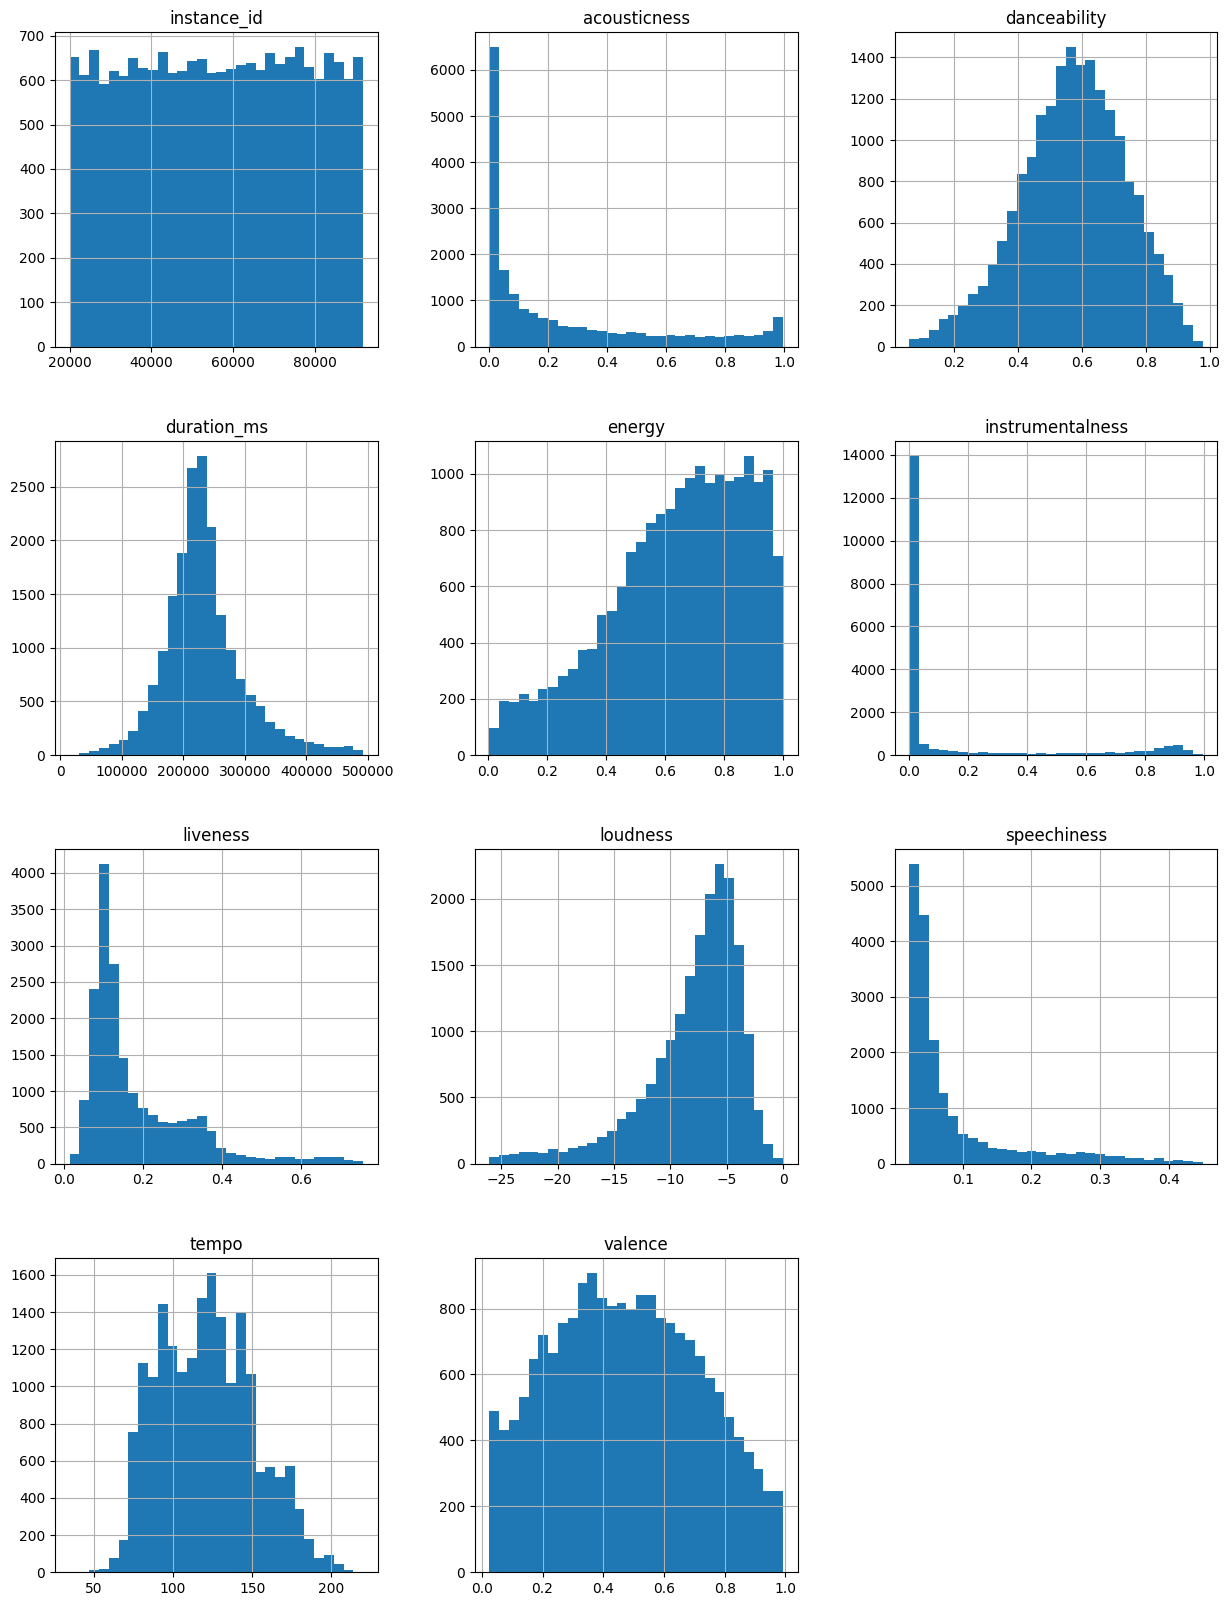

In [36]:
df.reset_index(drop=True, inplace= True)
explain_dataset(df,True)

## Заполнение пропусков в тестовых данных
Поскольку для заполнения пропусков в обучающих данных, мы использовали средние значения для известного жанра - в тестовых данных этот подход применить невозможно. Для заполнения значений - используем средние либо случайные значений, либо комбинации методов

In [37]:
#заполним пропуски в столбце key случайным значениями
def get_rand_key(sample_df):
    rand_key = sample_df['key'].unique()
    random_index = random.randint(0, len(rand_key) - 1)
    return rand_key[random_index]

df_test['key'] = df_test['key'].transform(lambda x: x.fillna(get_rand_key(df_test)))

In [38]:
#заполним пропуски в столбце mode типичными значениями для данной группы по key
df_test['mode'] = df_test.groupby('key')['mode'].transform(lambda x: x.fillna(x.value_counts().head(1).index[0]))

In [39]:
#заполним пропуски в столбце tempo медианой для данной группы по key и mode
df_test['tempo'] = df_test.groupby(['key', 'mode'])['tempo'].transform(lambda x: x.fillna(x.mean()))

In [40]:
#заполним значения признака с -1 медианой для данного группы по key и mode
df_test['duration_ms'] = df_test['duration_ms'].replace(-1,np.NaN)
df_test['duration_ms'] = df_test.groupby(['key', 'mode'])['duration_ms'].transform(lambda x: x.fillna(x.median()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19003 entries, 0 to 19002
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       19003 non-null  float64
 1   track_name        19003 non-null  object 
 2   acousticness      19003 non-null  float64
 3   danceability      19003 non-null  float64
 4   duration_ms       19003 non-null  float64
 5   energy            19003 non-null  float64
 6   instrumentalness  19003 non-null  float64
 7   key               19003 non-null  object 
 8   liveness          19003 non-null  float64
 9   loudness          19003 non-null  float64
 10  mode              19003 non-null  object 
 11  speechiness       19003 non-null  float64
 12  tempo             19003 non-null  float64
 13  obtained_date     19003 non-null  object 
 14  valence           19003 non-null  float64
 15  music_genre       19003 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000
mean,55990.929485,0.255113,0.571845,233597.120586,0.640631,0.143084,0.185080,-7.972647,0.087758,121.633055,0.474915
std,20709.914253,0.305071,0.165413,65192.227191,0.235470,0.290953,0.134608,4.386976,0.087084,29.823221,0.240243
min,20011.000000,0.000000,0.060000,15509.000000,0.004070,0.000000,0.013600,-26.044000,0.022300,34.765000,0.025200
25%,38142.000000,0.014000,0.465000,195693.500000,0.488000,0.000000,0.097200,-9.823000,0.035200,97.004000,0.285000
50%,56044.000000,0.108000,0.578000,225827.000000,0.674000,0.000098,0.129000,-6.874000,0.049000,120.888000,0.468000
75%,73956.000000,0.423000,0.688000,261067.000000,0.833000,0.050100,0.242000,-4.987000,0.094600,141.958500,0.660000
max,91758.000000,0.996000,0.978000,492306.000000,0.999000,0.996000,0.758000,-0.003000,0.449000,220.041000,0.992000


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.480000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.243000,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.228000,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.055800,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.227000,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
5,43934.0,Eskimo Blue Day - Remastered,0.102000,0.308,392893.0,0.590,0.371000,D,0.1120,-11.703,Major,0.0345,145.758,4-Apr,0.496,Blues
6,23450.0,Living On My Own,0.000234,0.655,218267.0,0.687,0.000024,A,0.0869,-11.789,Minor,0.0337,123.923,4-Apr,0.411,Rock
7,28380.0,Para Machuchar Meu Coracao,0.953000,0.591,309813.0,0.109,0.357000,D#,0.0921,-17.975,Major,0.0449,130.597,4-Apr,0.395,Jazz
8,70054.0,In the Mood,0.195000,0.647,283373.0,0.595,0.000118,A#,0.1290,-8.416,Minor,0.0336,73.478,4-Apr,0.546,Jazz
9,74815.0,20.000 Volts,0.032300,0.537,237000.0,0.962,0.193000,C,0.1580,-2.749,Major,0.1210,160.031,4-Apr,0.430,Electronic


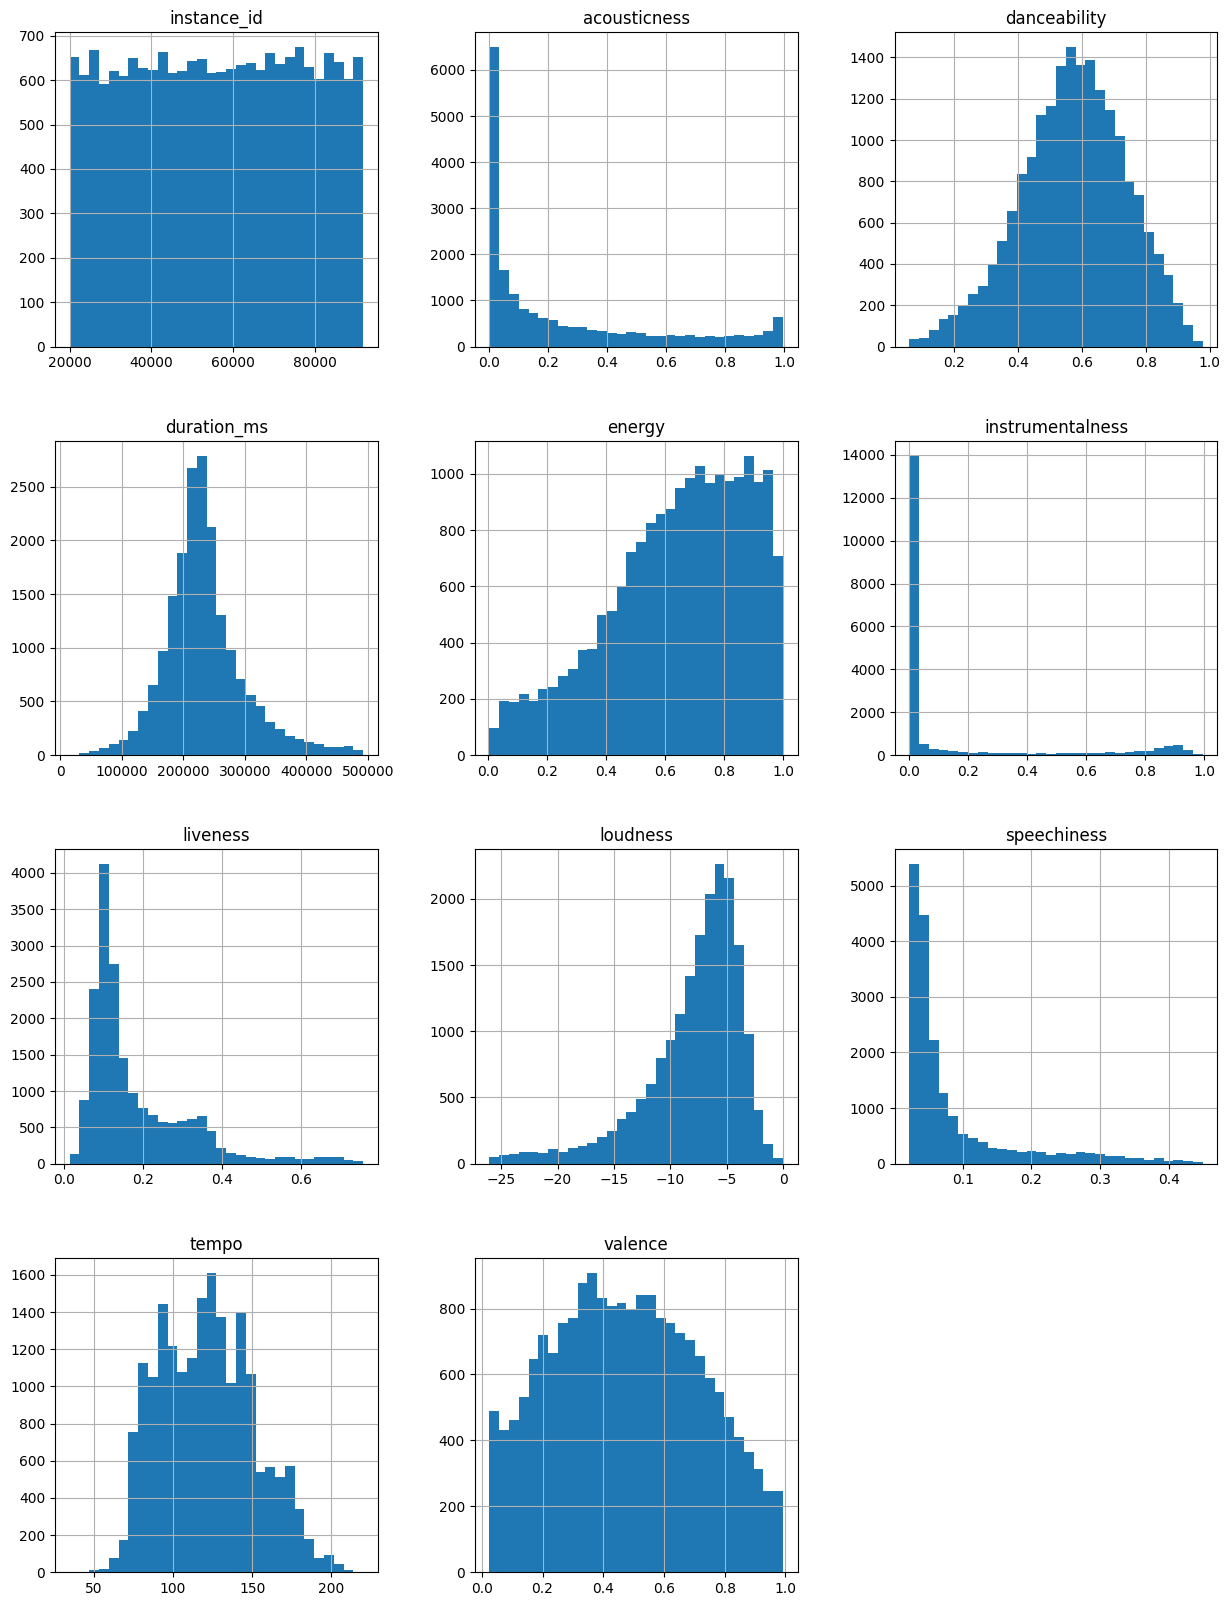

In [41]:
df.reset_index(drop=True, inplace= True)
explain_dataset(df,True)

# Разработка ML-модели

## Подготовка признаков

### Кодирование категориальных признаков

In [42]:
#добавим целевой признак в массив отбрасываемых столбцов
features_to_drop.append('music_genre')

In [43]:
#выделим целевой признак в отдельный датафрейм и сгруппируем признаки для предсказания в другом датафрейме
features = df.drop(features_to_drop, axis=1)
target = df['music_genre']

#проверим формат получившихся датасетов
print(f'Датасет features: {features.shape}')
print(f'Датасет target: {target.shape}')

Датасет features: (19003, 12)
Датасет target: (19003,)


In [44]:
#изучим получившийся датасет features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19003 entries, 0 to 19002
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      19003 non-null  float64
 1   danceability      19003 non-null  float64
 2   duration_ms       19003 non-null  float64
 3   energy            19003 non-null  float64
 4   instrumentalness  19003 non-null  float64
 5   key               19003 non-null  object 
 6   liveness          19003 non-null  float64
 7   loudness          19003 non-null  float64
 8   mode              19003 non-null  object 
 9   speechiness       19003 non-null  float64
 10  tempo             19003 non-null  float64
 11  valence           19003 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.7+ MB


В датасете встречаются категориальные признаки, которые могут быть важны для обучения, проведем прямое кодирований, чтобы адаптировать их для ML-модели

In [45]:
#выделим часть выборки для валидации
features_train_raw, features_valid_raw, target_train, target_valid = train_test_split(
features, target, test_size=0.25, random_state=12345, stratify=target)

In [46]:
#проведеm прямое кодирование признаков для обучающего датасета
features_to_encode = ['key','mode']

OHEncoder = OneHotEncoder()

transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), features_to_encode),
    remainder='passthrough')

#проведем обучение и кодирование для датасета features_train
features_train_ohe = transformer.fit_transform(features_train_raw)
features_train = pd.DataFrame(
    features_train_ohe, 
    columns=transformer.get_feature_names_out()
)

#проверим формат получившихся датасетов
print(f'Датасет features_train: {features_train.shape}')
print(f'Датасет target: {target_valid.shape}')

Датасет features_train: (14252, 22)
Датасет target: (4751,)


In [47]:
#проведем кодирование для датасета features_valid
features_valid_ohe = transformer.transform(features_valid_raw)
features_valid = pd.DataFrame(
    features_valid_ohe, 
    columns=transformer.get_feature_names_out()
)

#проверим формат получившихся датасетов
print(f'Датасет features_train: {features_valid.shape}')
print(f'Датасет target: {target_valid.shape}')

Датасет features_train: (4751, 22)
Датасет target: (4751,)


In [48]:
#аналогично подготовыи и тестовые данные
features_test_noohe = df_test.drop(features_to_drop, axis=1)
target_test = df_test['music_genre']


features_ohe_test_raw = transformer.transform(features_test_noohe)
features_test = pd.DataFrame(
    features_ohe_test_raw, 
    columns=transformer.get_feature_names_out()
)

In [49]:
#поскольку после применения OneHotEncoder в датасетах features сбросились индексы - сбросим их и для target
target_train = target_train.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

In [50]:
#выведем информацию о количестве записей в получившихся датасетах, чтобы проверить корректность разделения
print(f'Датасет features_train: {features_train.shape[0]}')
print(f'Датасет target_train: {target_train.shape[0]}')
print()
print(f'Датасет features_valid: {features_valid.shape[0]}')
print(f'Датасет target_valid: {target_valid.shape[0]}')
print()
print(f'Датасет features_test: {features_test.shape[0]}')
print(f'Датасет target_test: {target_test.shape[0]}')

Датасет features_train: 14252
Датасет target_train: 14252

Датасет features_valid: 4751
Датасет target_valid: 4751

Датасет features_test: 5099
Датасет target_test: 5099


### Масштабирование числовых признаков
Поскольку признаки в выборках находятся в разном масштабе - для повышения качества обучения их нужно привести к единому. Используем масштабирование путем нормализации значений всех признаков в диапазоне от 0 до 1, поскольку дамми-признаки после кодирования категориальных признаков - имеют значения либо 0 либо 1 и будут в одном мас

In [51]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14252 entries, 0 to 14251
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   onehotencoder__key_A#        14252 non-null  float64
 1   onehotencoder__key_B         14252 non-null  float64
 2   onehotencoder__key_C         14252 non-null  float64
 3   onehotencoder__key_C#        14252 non-null  float64
 4   onehotencoder__key_D         14252 non-null  float64
 5   onehotencoder__key_D#        14252 non-null  float64
 6   onehotencoder__key_E         14252 non-null  float64
 7   onehotencoder__key_F         14252 non-null  float64
 8   onehotencoder__key_F#        14252 non-null  float64
 9   onehotencoder__key_G         14252 non-null  float64
 10  onehotencoder__key_G#        14252 non-null  float64
 11  onehotencoder__mode_Minor    14252 non-null  float64
 12  remainder__acousticness      14252 non-null  float64
 13  remainder__dance

In [52]:
#создадим массив столбцов, которые нужно масшабировать
pd.options.mode.chained_assignment = None
numeric = ['remainder__acousticness', 'remainder__danceability', 'remainder__duration_ms', 'remainder__energy', 'remainder__instrumentalness',
           'remainder__liveness', 'remainder__loudness', 'remainder__speechiness', 'remainder__tempo', 'remainder__valence']

In [53]:
#рассмотрим диапазон значений выбраных признаков
features_train[numeric].describe()

,remainder__acousticness,remainder__danceability,remainder__duration_ms,remainder__energy,remainder__instrumentalness,remainder__liveness,remainder__loudness,remainder__speechiness,remainder__tempo,remainder__valence
count,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000
mean,0.254616,0.572003,233719.106125,0.641496,0.141697,0.185933,-7.967717,0.087767,121.565522,0.474883
std,0.304654,0.164643,64890.799241,0.234333,0.289300,0.135378,4.369955,0.086851,29.746266,0.240256
min,0.000000,0.060200,15509.000000,0.004070,0.000000,0.013600,-26.044000,0.022300,34.765000,0.025200
25%,0.013900,0.465000,195969.750000,0.491000,0.000000,0.097000,-9.808750,0.035200,96.978500,0.286000
50%,0.108000,0.579000,225827.000000,0.676000,0.000093,0.129000,-6.867500,0.049100,120.717500,0.467500
75%,0.420000,0.688000,260856.500000,0.833000,0.048125,0.245000,-4.997000,0.095000,141.969500,0.660000
max,0.996000,0.978000,492085.000000,0.999000,0.996000,0.756000,-0.003000,0.449000,220.041000,0.992000


In [54]:
#масштабируем данные
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(features_train[numeric])
features_train[numeric] = scaler1.transform(features_train[numeric])
features_valid[numeric] = scaler1.transform(features_valid[numeric])
features_test[numeric] = scaler1.transform(features_test[numeric])

In [55]:
#повторно рассмотрим диапазон значений выбраных признаков, чтобы проверить масштабирование
features_train[numeric].describe()

,remainder__acousticness,remainder__danceability,remainder__duration_ms,remainder__energy,remainder__instrumentalness,remainder__liveness,remainder__loudness,remainder__speechiness,remainder__tempo,remainder__valence
count,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000,14252.000000
mean,0.255638,0.557641,0.457871,0.640674,0.142266,0.232129,0.694147,0.153426,0.468493,0.465126
std,0.305877,0.179389,0.136160,0.235527,0.290462,0.182352,0.167811,0.203542,0.160551,0.248507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013956,0.441055,0.378661,0.489411,0.000000,0.112338,0.623450,0.030232,0.335788,0.269756
50%,0.108434,0.565265,0.441311,0.675354,0.000094,0.155442,0.736396,0.062808,0.463916,0.457489
75%,0.421687,0.684027,0.514813,0.833154,0.048318,0.311692,0.808225,0.170377,0.578621,0.656599
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Обучение моделей

### Подбор гиперпараметров для "деревянных" моделей

In [56]:
#зададим диапазон гиперпараметров для перебора при обучении моделей
DT_max_depth_range=(10,25)
min_samples_leaf=(10,20)

n_estimators_range=(15,30)
RF_max_depth_range=(17,30)

In [57]:
# подберем наилучшее значение max_depth и min_samples_leaf для модели решающего дерева
best_DT_model = None
best_DT_result = 0
best_depth = 0
best_sleaf = 0

for depth in tqdm(range(DT_max_depth_range[0],DT_max_depth_range[1])):
    for sleaf in range(min_samples_leaf[0],min_samples_leaf[1]):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=sleaf, class_weight='balanced')
        model.fit(features_train, target_train)

        predictions = model.predict(features_valid)
        #result = f1_score(predictions, target_valid, average='macro')
        result = fbeta_score(predictions, target_valid, average='macro',beta=0.5)

        if result > best_DT_result:
            best_DT_model = model
            best_DT_result = result
            best_depth = depth
            best_sleaf = sleaf

#рассчитаем метрику AUC-ROC для модели
probabilities_valid = best_DT_model.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid, probabilities_valid, multi_class='ovo')
        
print(f'Наилучший результат fbeta_score {best_DT_result:0.06} показала модель решающего дерева с max_depth = {best_depth}, min_samples_leaf = {best_sleaf}, AUC-ROC:{auc_roc:.4f}')

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:58<00:00,  3.88s/it]

Наилучший результат fbeta_score 0.392257 показала модель решающего дерева с max_depth = 14, min_samples_leaf = 16, AUC-ROC:0.7895


In [58]:
#подберем наилучшее значение n_estimators и max_depth для модели случайного леса c взвешенными классами
best_RF_model = None
best_RF_result = 0
best_est = 0
best_depth = 0

for est in tqdm(range(n_estimators_range[0], n_estimators_range[1])):
    for depth in range(RF_max_depth_range[0],RF_max_depth_range[1]):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
    
        predictions = model.predict(features_valid)
        #result = f1_score(predictions, target_valid, average='macro')
        result = fbeta_score(predictions, target_valid, average='macro',beta=0.5)
    
        if result > best_RF_result:
            best_RF_model = model
            best_RF_result = result
            best_est = est
            best_depth = depth

#рассчитаем метрику AUC-ROC для модели
probabilities_valid = best_RF_model.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid, probabilities_valid, multi_class='ovo')        

print(f'Наилучший результат fbeta_score {best_RF_result:0.06} показала модель случайного леса с n_estimators = {best_est} и max_depth = {best_depth}, AUC-ROC:{auc_roc:.4f}')

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [06:14<00:00, 24.94s/it]

Наилучший результат fbeta_score 0.423957 показала модель случайного леса с n_estimators = 28 и max_depth = 18, AUC-ROC:0.8452


# Выгрузка результата

In [59]:
result_df=pd.DataFrame()
result_df['instance_id'] = df_test['instance_id']
#result_df['music_genre'] = best_DT_model.predict(features_test)
result_df['music_genre'] = best_RF_model.predict(features_test)
result_df.to_csv('sample_submit.csv', index=False)